In [13]:
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import torch
from tqdm.notebook import tqdm
import torch.optim as optim
from numpy.fft import fft

In [3]:
sampling_rate = 500
t = np.linspace(0,1, sampling_rate) 

frequency1 = 5   # 5 Hz
frequency2 = 50  # 50 Hz
frequency3 = 120 # 120 Hz

signal1 = np.sin(2 * np.pi * frequency1 * t)
signal2 = np.sin(2 * np.pi * frequency2 * t)
signal3 = np.sin(2 * np.pi * frequency3 * t)

new_signal = signal1 + signal2 + signal3

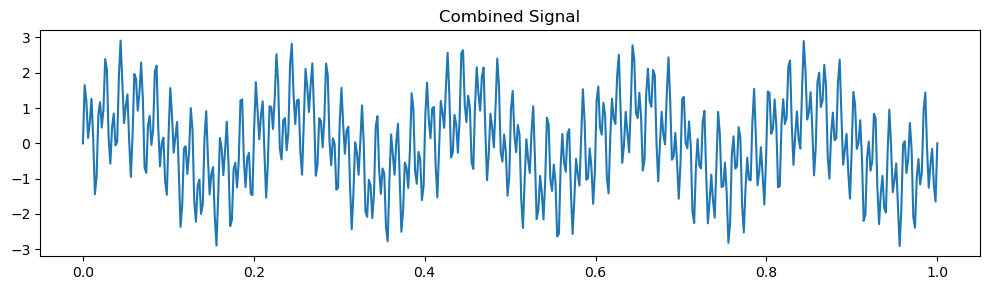

In [4]:
plt.figure(figsize=(10, 3))
plt.plot(t, new_signal)
plt.title('Combined Signal')
plt.tight_layout()
plt.show()


In [5]:
combined_signal = new_signal.reshape(1,-1)
combined_signal.shape

(1, 500)

In [6]:
input_signal = torch.tensor(combined_signal, dtype = torch.float32)
input_signal.shape

torch.Size([1, 500])

In [7]:
# Feed-forward Autoencoder

class feedfrwd_autoencoder(nn.Module):
    def __init__(self,latent_size,input_size=sampling_rate, batch_first=True):
        super(feedfrwd_autoencoder, self).__init__()
        self.batch_first = batch_first
        self.L1 = nn.Linear(input_size,300)
        self.L2 = nn.Linear(300,150)
        self.L3 = nn.Linear(150,100)
        self.L4 = nn.Linear(100,50)
        self.L5 = nn.Linear(50,15)
        self.Latent_layer = nn.Linear(15,latent_size)
        self.L6 = nn.Linear(latent_size,15)
        self.L7 = nn.Linear(15,50)
        self.L8 = nn.Linear(50,100)
        self.L9 = nn.Linear(100,150)
        self.L10 = nn.Linear(150,300)
        self.L11 = nn.Linear(300, input_size)
        self.sigmoid = nn.Sigmoid()

    def encoder(self, x):
        x = self.sigmoid(self.L1(x))
        x = self.sigmoid(self.L2(x))
        x = self.sigmoid(self.L3(x))
        x = self.sigmoid(self.L4(x))
        x = self.sigmoid(self.L5(x))
        x = self.Latent_layer(x)  
        return x

    def decoder(self, x):
        x = self.sigmoid(self.L6(x))
        x = self.sigmoid(self.L7(x))
        x = self.sigmoid(self.L8(x))
        x = self.sigmoid(self.L9(x))
        x = self.sigmoid(self.L10(x))
        x = self.L11(x) 
        return x
    
    def forward(self,x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

def train_model(model,data,num_epochs, learning_rate):
    loss_func = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    for epoch in tqdm(range(num_epochs)):
        model.train()
        optimizer.zero_grad()
        output = model.forward(data)
        loss = loss_func(output,data)
        loss.backward()
        optimizer.step()

        if (epoch) % 10 == 0:
            print(f'Epochs: {epoch}/{num_epochs}, Loss value: {loss.item():.5f}')

    print(f'Total number of epochs: {num_epochs} , Training completed')    

In [8]:
model = feedfrwd_autoencoder(latent_size=5)
train_model(model,input_signal, num_epochs=100, learning_rate = 0.001)

  0%|          | 0/100 [00:00<?, ?it/s]

Epochs: 0/100, Loss value: 1.63746
Epochs: 10/100, Loss value: 0.12791
Epochs: 20/100, Loss value: 0.04365
Epochs: 30/100, Loss value: 0.01791
Epochs: 40/100, Loss value: 0.00562
Epochs: 50/100, Loss value: 0.00188
Epochs: 60/100, Loss value: 0.00081
Epochs: 70/100, Loss value: 0.00028
Epochs: 80/100, Loss value: 0.00009
Epochs: 90/100, Loss value: 0.00003
Total number of epochs: 100 , Training completed


In [9]:
signal_output = model.forward(input_signal)
print(signal_output.shape)

torch.Size([1, 500])


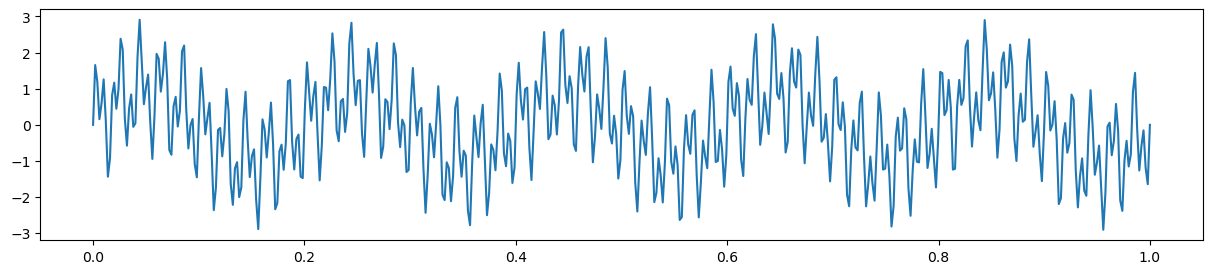

In [10]:
# Without Training
plt.figure(figsize=(15,3))
plt.plot(t,signal_output[0].detach().numpy())

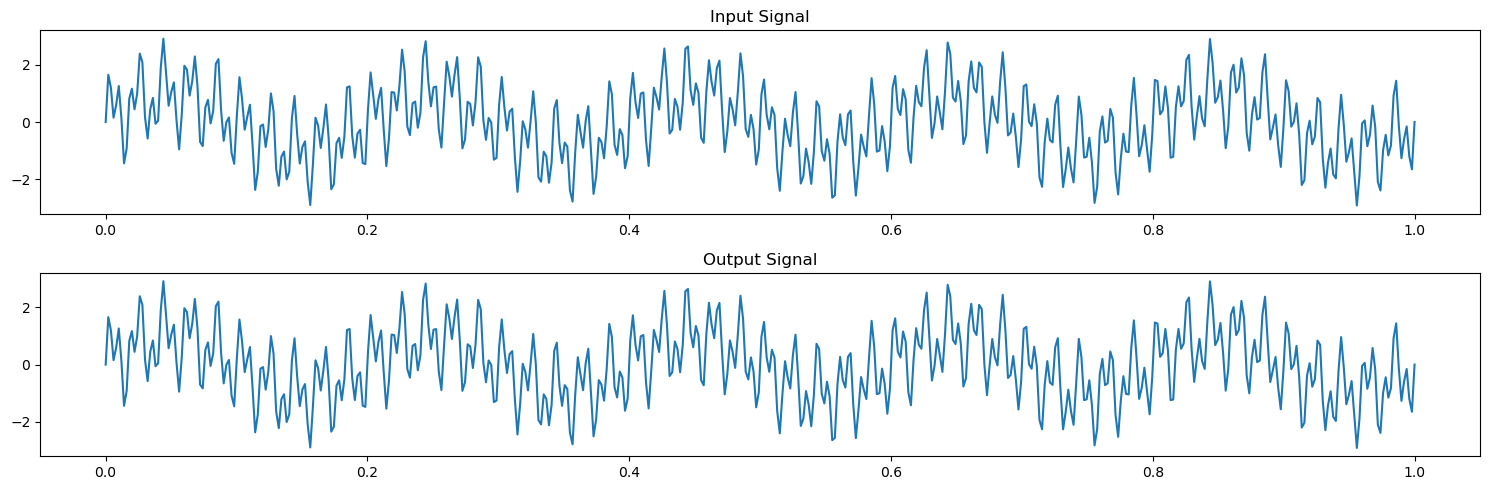

In [11]:
fig, ax = plt.subplots(2, figsize=(15, 5))  # Create 2 subplots

ax[0].plot(t, new_signal)
ax[0].set_title('Input Signal')

ax[1].plot(t, signal_output[0].detach().numpy())
ax[1].set_title('Output Signal')

plt.tight_layout()
plt.show()

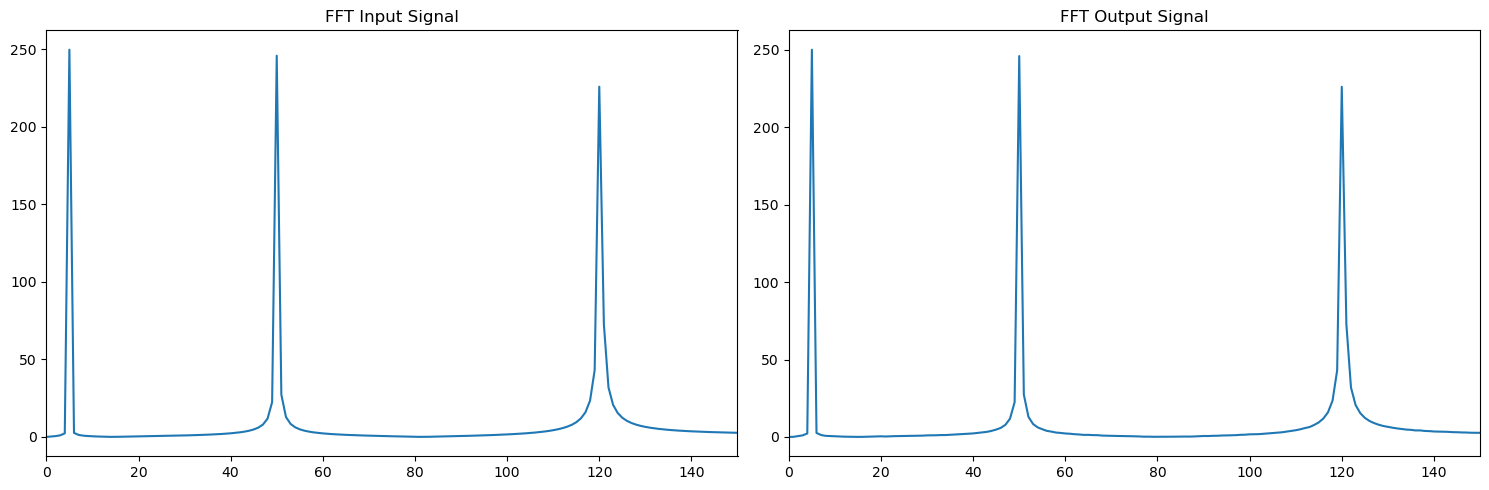

In [15]:
# FFT plots
sr = 500

fft_input = fft(new_signal)
N_input = len(fft_input)
n_input = np.arange(N_input)
T_input = N_input/sr
freq_input = n_input/T_input

fft_output = fft(signal_output[0].detach().numpy())
N_output = len(fft_output)
n_output = np.arange(N_output)
T_output = N_output/sr
freq_output = n_output/T_output

fig, ax = plt.subplots(1,2, figsize=(15,5))  # Create 2 subplots

ax[0].plot(freq_input, np.abs(fft_input))
ax[0].set_title('FFT Input Signal')
ax[0].set_xlim(0,150)

ax[1].plot(freq_output, np.abs(fft_output))
ax[1].set_title('FFT Output Signal')
ax[1].set_xlim(0,150)

plt.tight_layout()
plt.show()
